In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
from datetime import datetime
from IPython.display import clear_output
#%matplotlib nbagg
%matplotlib inline

In [65]:
d = pd.read_csv("Hamish3.txt",delimiter='\t',header=None)
channel = np.array(d[0])
edge = np.array(d[1])
time = np.array(d[2])

MemoryError: Unable to allocate 61.0 MiB for an array with shape (2, 3999455) and data type int64

# Data Overview

In [ ]:
bns = 1*1000 # 1 second times 1000 ms to bin every ms
cn1=1
cn2=2
cn3=3
cn4=4
endTime=1e9 #1 second

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="First", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 second (1 bin per ms)")
pp.grid()
pp.show()

In [ ]:
pp.close()
bns = 6000
cn1=1
cn2=2
cn3=3
cn4=4
endTime=60*1e9 #1 min

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 minute (1 bin per 2 ms)")
pp.grid()
pp.show()

In [ ]:
bns = 200 # 1 second times 1000 ms to bin every ms
cn1=1
cn2=2
cn3=3
cn4=4
endTime=1e9 #1 second

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="First", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 second (200 bins)")
pp.grid()
pp.show()

In [ ]:
pp.close()
bns = 200
cn1=1
cn2=2
cn3=3
cn4=4
endTime=60*1e9 #1 min
#60463699912.9

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="Firsy", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 minute (200 bins)")
pp.grid()
pp.show()

## Start Cutting 'n' hits per bin

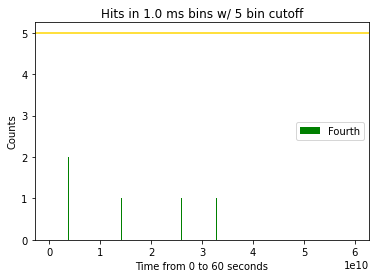

# bins
60000
# bins with low occurances
944
# bins with more occurances
59056


In [137]:
startTime = 0*1e9 #10 secs , 10000 bins = 1bin per 1ms
endTime = 60*1e9
nBins = 60000
ti = endTime - startTime
ms = 1e6 # ms
binRate = round((ti/ms)/nBins,0)
cutOff = 5 #hits per bin
counts, edges, plot = pp.hist(time[np.where(np.logical_and(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime),time>=startTime))],bins=nBins,label="Fourth", histtype="barstacked", color = 'Green')

pp.title("Hits in " + str(binRate) + " ms bins w/ " + str(cutOff) + " bin cutoff")
pp.xlabel("Time from 0 to 60 seconds")
pp.ylabel("Counts")
pp.legend()
pp.axhline(cutOff, color = 'Gold')
pp.show()

lowOccuranceBins = []
otherBins = []
for _ in range(len(counts)):
    occ = counts[_]
    if (occ > 0 and occ <= cutOff):
        lowOccuranceBins.append([_*1e6 + startTime, occ])
    else:
        otherBins.append([_, occ])

print("# bins")
print(len(counts))
print("# bins with low occurances")
print(len(lowOccuranceBins))
print("# bins with more occurances")
print(len(otherBins))

In [138]:
#display(counts)

In [139]:
print(lowOccuranceBins[0][0])

0.0


In [140]:
lowTimeRanges = []
lenL = len(lowOccuranceBins)
display(lenL)
_ = 0

while _ < lenL: # iterate over each hindex _ in lowOccuraceBins
    t = lowOccuranceBins[_][0] # save the first value as t
    z = 1
    while (_ + z < lenL): # make sure in range
        if(lowOccuranceBins[_ + z][0] == t + z*1000000): # if the next entry is suxxessive in time
            z += 1                                             # go to the next entry
        else:                                            
            break                                              # break if not successive
    lowTimeRanges.append([t, lowOccuranceBins[_ + z - 1][0] + 1000000])  # save start and end time values
    _ = _ + z                                                  # move the index to the next entry that is not succesive
    

    
display("~~~~~")
display(len(lowTimeRanges))
print(lowTimeRanges)

944

'~~~~~'

933

[[0.0, 1000000.0], [33000000.0, 34000000.0], [63000000.0, 64000000.0], [144000000.0, 145000000.0], [177000000.0, 178000000.0], [206000000.0, 207000000.0], [240000000.0, 241000000.0], [313000000.0, 314000000.0], [318000000.0, 319000000.0], [350000000.0, 351000000.0], [565000000.0, 566000000.0], [622000000.0, 623000000.0], [632000000.0, 633000000.0], [651000000.0, 652000000.0], [664000000.0, 665000000.0], [720000000.0, 721000000.0], [947000000.0, 948000000.0], [1148000000.0, 1149000000.0], [1173000000.0, 1174000000.0], [1225000000.0, 1226000000.0], [1246000000.0, 1247000000.0], [1255000000.0, 1256000000.0], [1398000000.0, 1399000000.0], [1476000000.0, 1477000000.0], [1563000000.0, 1564000000.0], [1595000000.0, 1596000000.0], [1617000000.0, 1618000000.0], [1810000000.0, 1811000000.0], [1826000000.0, 1827000000.0], [1884000000.0, 1885000000.0], [1907000000.0, 1908000000.0], [2093000000.0, 2094000000.0], [2117000000.0, 2118000000.0], [2122000000.0, 2123000000.0], [2384000000.0, 2385000000.0

In [141]:
def lowTimeBool(time, lowTimeRanges): #Returns true or false if that time is in the range
    for rang in lowTimeRanges:
        if( np.logical_and(time>=rang[0],time<rang[1])):
            #display(time)
            return True
    #display(time)
    return False

In [142]:
def lowTimeFile(time, lowTimeRanges, tmax = 60000000000.0,tmin = 0): #Sorts times in/out of rangeand returns 2 arrays
    start = datetime.now()
    lowTimeArray = []
    otherTimeArray = []
    for _ in range(len(time)):
        val = False
        clear_output(wait=True)
        display(str(round((time[_]-tmin)*100 / (tmax-tmin), 3)) + " %")
        for rang in lowTimeRanges:
            if( np.logical_and( time[_] >= rang[0], time[_] < rang[1] ) ):
                val = True
        if(val):
            lowTimeArray.append(time[_])
        else:
            otherTimeArray.append(time[_])
    #lowTimeArray = np.array(lowTimeArray)
    #otherTimeArray = np.array(otherTimeArray)
    end = datetime.now()
    print("DONE (∩｀-´)⊃━☆ﾟ.*･｡ﾟ " + str(end-start))
    return lowTimeArray, otherTimeArray

In [143]:
lowTimes, highTimes = lowTimeFile(time[np.logical_and(np.logical_and(np.logical_and(channel==cn4,edge==0), time<=endTime),time>=startTime)], lowTimeRanges, endTime, startTime)

'99.758 %'

DONE (∩｀-´)⊃━☆ﾟ.*･｡ﾟ 0:00:03.583936


In [144]:
print(len(lowTimes))
print()
print(len(highTimes))

21

953


In [145]:
#print(lowTimes)
#print()
#print(highTimes)

## Time Diff Between Consecutive

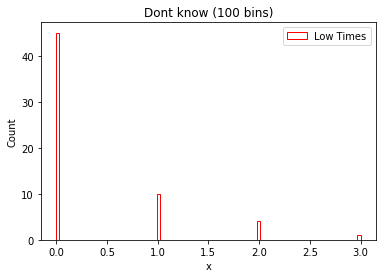

In [146]:
#threhshold = 0.5
bns = 100
one_s_bins, *trash = np.histogram(lowTimes,bins=60)
#two_s_bins, *trash = np.histogram(highTimes,bins=60)

pp.hist(one_s_bins, bins = bns, label = "Low Times", histtype = "step", color = 'Red')
#pp.axvline(x=threhshold,ymin=0,ymax=600, color = "gold")
pp.legend()
pp.xlabel('x')
pp.ylabel("Count")
pp.title("Dont know (" + str(bns)+" bins)")
pp.show()

In [147]:
def getDiffs(tymes):
    diffs = []
    for _ in range(len(tymes) - 1):
        diffs.append(tymes[_+1] - tymes[_])
    return diffs

In [148]:
def getDiffs(tymes):
    diffs = []
    for _ in range(len(tymes) - 1):
        diffs.append(tymes[_+1] - tymes[_])
    return diffs

In [149]:
lowDiffs = getDiffs(lowTimes)
highDiffs = getDiffs(highTimes)
allDiffs = lowDiffs + highDiffs

In [150]:
display(len(lowDiffs))
display()
display(len(highTimes))

20

953

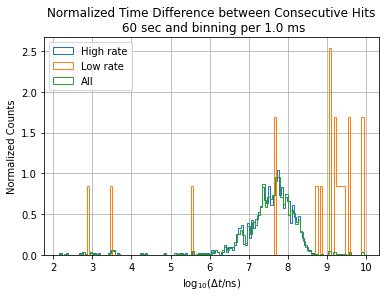

In [151]:
bns = 120
timeLength = int((endTime - startTime)*1e-9)
ax = pp.subplot(1,1,1)
ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
ax.hist(np.log10(lowDiffs), bins = bns, histtype = 'step', density = True, label = 'Low rate')
ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All')
ax.grid()
ax.set_axisbelow(True)
#ax.set_xlim(1,7)
#ax.set_ylim(-0.05,0.8)
ax.legend(loc = 'upper left')
ax.set_ylabel("Normalized Counts")
ax.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax.set_title("Normalized Time Difference between Consecutive Hits\n " + str(timeLength) + " sec and binning per " + str(binRate) + " ms")
pp.show()